# #1.  With OHE and Scaling

In [890]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [891]:
# Read
csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')
df.head()

,Company,Memory_Structure_Categories,Gpu_Type,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,Asus,Hybrid,GeForce GTX 1080,Nvidia,Windows 10,Intel,17.3,2.9,32,512,4.7,4279
1,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.7,32,512,4.6,3564
2,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.7,16,256,4.6,3025
3,Lenovo,Hybrid,GeForce GTX 1070,Nvidia,Windows 10,Intel,17.3,2.7,32,256,4.6,2929
4,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.6,16,128,4.6,2519


In [892]:
df = df.drop(["Gpu_Type"], axis=1)

In [893]:
df

,Company,Memory_Structure_Categories,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,Asus,Hybrid,Nvidia,Windows 10,Intel,17.3,2.90,32,512,4.70,4279
1,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,512,4.60,3564
2,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,16,256,4.60,3025
3,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,256,4.60,2929
4,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...,...,...,...,...,...
1297,Samsung,SSD,Intel,Windows 10,Intel,13.3,2.50,8,256,0.81,1649
1298,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,711
1299,Lenovo,Flash,Intel,Android,Intel,10.1,1.44,4,64,0.69,604
1300,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,527


In [894]:
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df2 = pd.get_dummies(df, columns=column_names_for_onehot)
X = df2.drop(["Price_dollars"], axis=1)
y = df2["Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

(1302, 42) (1302,)


In [895]:
df2

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_Company_Nvidia,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,17.3,2.90,32,512,4.70,4279,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,17.3,2.70,32,512,4.60,3564,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,17.3,2.70,16,256,4.60,3025,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,17.3,2.70,32,256,4.60,2929,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,17.3,2.60,16,128,4.60,2519,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,1649,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1298,10.1,1.44,4,64,0.69,711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,10.1,1.44,4,64,0.69,604,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1300,10.1,1.44,4,64,0.69,527,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [896]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6977709309159265


In [897]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result

,Actual,Predicted,pctDiff
1232,317,678.0,113.9
1030,2452,1438.0,41.4
163,1099,1250.0,13.7
1012,1216,1206.0,0.8
711,384,-140.0,136.5
...,...,...,...
34,1098,1554.0,41.5
85,886,638.0,28.0
978,703,1002.0,42.5
156,2299,1574.0,31.5


### notice the negative price values above.

#### "Linear regression does not respect the bounds of 0. It's linear, always and everywhere. It may not be appropriate for values that need to be close to 0 but are strictly positive." (https://stats.stackexchange.com/questions/145383/getting-negative-predicted-values-after-linear-regression)

In [898]:
result[result < 0].count()

Actual       0
Predicted    3
pctDiff      0
dtype: int64

In [899]:
result.pctDiff.mean()

33.43466257668712

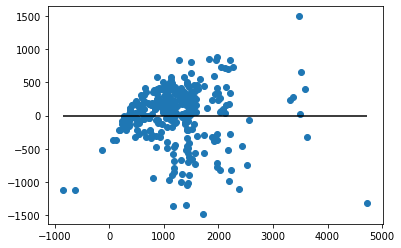

In [900]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

In [902]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result
result.pctDiff.mean()

20.00276073619632

# #2. with OHE but no scaling

In [911]:
df = pd.read_csv(csv_path,encoding='latin-1')
df = df.drop(["Gpu_Type"], axis=1)
 
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df2 = pd.get_dummies(df, columns=column_names_for_onehot)
X = df2.drop(["Price_dollars"], axis=1)
y = df2["Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 42) (1302,)


In [912]:
df2

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_Company_Nvidia,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,17.3,2.90,32,512,4.70,4279,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,17.3,2.70,32,512,4.60,3564,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,17.3,2.70,16,256,4.60,3025,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,17.3,2.70,32,256,4.60,2929,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,17.3,2.60,16,128,4.60,2519,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,1649,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1298,10.1,1.44,4,64,0.69,711,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,10.1,1.44,4,64,0.69,604,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1300,10.1,1.44,4,64,0.69,527,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [913]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7234799509010785


In [914]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result

,Actual,Predicted,pctDiff
1232,317,531.153640,67.6
1030,2452,1428.260408,41.8
163,1099,1262.143926,14.8
1012,1216,1048.179616,13.8
711,384,91.940561,76.1
...,...,...,...
34,1098,1552.958563,41.4
85,886,641.126418,27.6
978,703,922.901852,31.3
156,2299,1556.761187,32.3


In [915]:
result[result < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [916]:
result.pctDiff.mean()

29.607668711656437

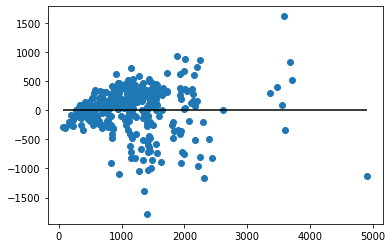

In [917]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

In [918]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result
result.pctDiff.mean()

19.975153374233127

# #3. without OHE but with scaling

In [1002]:
df = pd.read_csv(csv_path,encoding='latin-1')
df = df.drop(["Gpu_Type"], axis=1)

df2 = df.drop(["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"], axis=1)

In [1003]:
df2

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,17.3,2.90,32,512,4.70,4279
1,17.3,2.70,32,512,4.60,3564
2,17.3,2.70,16,256,4.60,3025
3,17.3,2.70,32,256,4.60,2929
4,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,1649
1298,10.1,1.44,4,64,0.69,711
1299,10.1,1.44,4,64,0.69,604
1300,10.1,1.44,4,64,0.69,527


In [1004]:
X = df2.drop(["Price_dollars"], axis=1)
y = df2["Price_dollars"]
print(X.shape, y.shape)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

(1302, 5) (1302,)
(1302, 5) (1302,)


In [1005]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6397724832161193


In [1006]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result

,Actual,Predicted,pctDiff
1232,317,946.935780,198.7
1030,2452,1377.356679,43.8
163,1099,1120.720460,2.0
1012,1216,937.319603,22.9
711,384,559.413777,45.7
...,...,...,...
34,1098,1883.577297,71.5
85,886,446.369618,49.6
978,703,1070.832128,52.3
156,2299,1431.348156,37.7


In [1007]:
result[result < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [1008]:
result.pctDiff.mean()

37.533742331288344

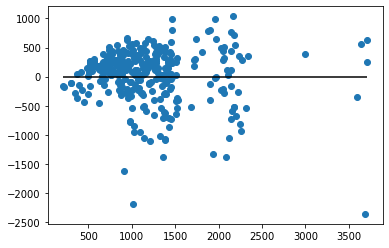

In [1009]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

In [1010]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result
result.pctDiff.mean()

22.912269938650304

# #4. without OHE and without scaling

In [1011]:
csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df2 = df.drop(["Gpu_Type","Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"], axis=1)
df2

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,17.3,2.90,32,512,4.70,4279
1,17.3,2.70,32,512,4.60,3564
2,17.3,2.70,16,256,4.60,3025
3,17.3,2.70,32,256,4.60,2929
4,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,1649
1298,10.1,1.44,4,64,0.69,711
1299,10.1,1.44,4,64,0.69,604
1300,10.1,1.44,4,64,0.69,527


In [1012]:
X = df2.drop(["Price_dollars"], axis=1)
y = df2["Price_dollars"]
print(X.shape, y.shape)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 5) (1302,)
(1302, 5) (1302,)


In [1013]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6397724832161189


In [1014]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result

,Actual,Predicted,pctDiff
1232,317,946.935780,198.7
1030,2452,1377.356679,43.8
163,1099,1120.720460,2.0
1012,1216,937.319603,22.9
711,384,559.413777,45.7
...,...,...,...
34,1098,1883.577297,71.5
85,886,446.369618,49.6
978,703,1070.832128,52.3
156,2299,1431.348156,37.7


In [1015]:
result[result < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [1016]:
result.pctDiff.mean()

37.533742331288344

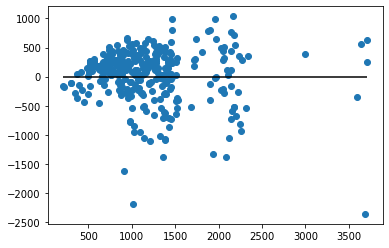

In [1017]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

In [1019]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result

result.pctDiff.mean()

22.92331288343558

# #5. Log-transformed data; with OHE and no scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208C0F9BB70>]],
      dtype=object)

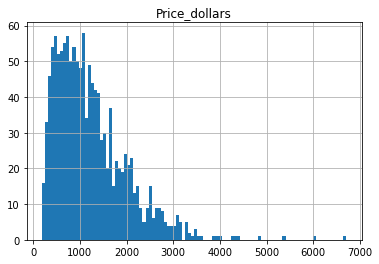

In [961]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df.hist(column='Price_dollars', bins=100)

## Linear Regression Model: 


In [962]:
# excluding laptops that costs over 6000 dollars
# df = df[df['Price_dollars'] < 6000]


In [963]:

df.head()
df2=df
df2

,Company,Memory_Structure_Categories,Gpu_Type,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,Asus,Hybrid,GeForce GTX 1080,Nvidia,Windows 10,Intel,17.3,2.90,32,512,4.70,4279
1,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.70,32,512,4.60,3564
2,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.70,16,256,4.60,3025
3,Lenovo,Hybrid,GeForce GTX 1070,Nvidia,Windows 10,Intel,17.3,2.70,32,256,4.60,2929
4,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Samsung,SSD,HD Graphics 620,Intel,Windows 10,Intel,13.3,2.50,8,256,0.81,1649
1298,Lenovo,Flash,HD Graphics 400,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,711
1299,Lenovo,Flash,HD Graphics 400,Intel,Android,Intel,10.1,1.44,4,64,0.69,604
1300,Lenovo,Flash,HD Graphics 400,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,527


In [964]:
import pandas as pd
import numpy as np
df2['Log_Price_dollars'] = np.log(df2['Price_dollars'])

In [965]:
df2 = df2.drop(["Price_dollars", "Gpu_Type"], axis=1)
df2

,Company,Memory_Structure_Categories,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Log_Price_dollars
0,Asus,Hybrid,Nvidia,Windows 10,Intel,17.3,2.90,32,512,4.70,8.361475
1,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,512,4.60,8.178639
2,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,16,256,4.60,8.014666
3,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,256,4.60,7.982416
4,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.60,16,128,4.60,7.831617
...,...,...,...,...,...,...,...,...,...,...,...
1297,Samsung,SSD,Intel,Windows 10,Intel,13.3,2.50,8,256,0.81,7.407924
1298,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,6.566672
1299,Lenovo,Flash,Intel,Android,Intel,10.1,1.44,4,64,0.69,6.403574
1300,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,6.267201


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208C20EEEF0>]],
      dtype=object)

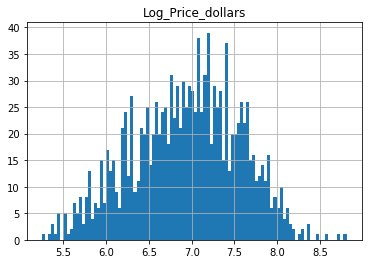

In [966]:
df2.hist(column='Log_Price_dollars', bins=100)

In [967]:
column_names_for_onehot = df2[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
column_names_for_onehot

Index(['Company', 'Cpu_Company', 'Memory_Structure_Categories', 'Gpu_Company',
       'OpSys'],
      dtype='object')

In [968]:
df2 = pd.get_dummies(df2, columns=column_names_for_onehot)
X = df2.drop(["Log_Price_dollars"], axis=1)
y = df2["Log_Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 42) (1302,)


In [969]:
X

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Gpu_Company_Nvidia,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,17.3,2.90,32,512,4.70,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,17.3,2.70,32,512,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,17.3,2.70,16,256,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,17.3,2.70,32,256,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,17.3,2.60,16,128,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1298,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1300,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [970]:
y = df2["Log_Price_dollars"]
y

0       8.361475
1       8.178639
2       8.014666
3       7.982416
4       7.831617
          ...   
1297    7.407924
1298    6.566672
1299    6.403574
1300    6.267201
1301    5.860786
Name: Log_Price_dollars, Length: 1302, dtype: float64

In [971]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7609624880867477


In [972]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred), 'pctDiff': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),1)})
result

,Actual,Predicted,pctDiff
1232,317.0,412.625542,30.2
1030,2452.0,1336.423831,45.5
163,1099.0,1084.621291,1.3
1012,1216.0,1054.828357,13.3
711,384.0,343.988549,10.4
...,...,...,...
34,1098.0,908.535309,17.3
85,886.0,608.466302,31.3
978,703.0,882.247940,25.5
156,2299.0,1441.977808,37.3


In [973]:
result[result < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [974]:
result.pctDiff.mean()

25.1659509202454

In [975]:
np.exp(y_test).max()

6048.999999999995

In [976]:
np.exp(y_pred).max()

5076.0465551033

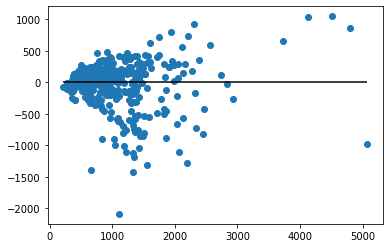

In [977]:
# Plot Residuals
plt.scatter(np.exp(y_pred), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

# The lienar model is usually underestimating how much something costs

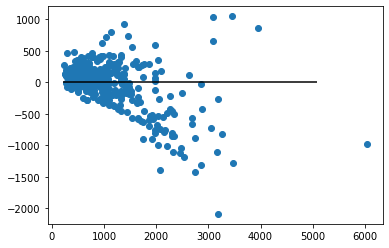

In [978]:
# Plot Residuals-like plot
plt.scatter(np.exp(y_test), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

In [979]:
result2 = pd.DataFrame(list(zip(model.coef_, X)))
result2 = result2.sort_values(0)
result2.columns = ['Weights','Coefficient']
result2

,Coefficient,Weights
22,-0.636398,Company_Vero
17,-0.535152,Company_Mediacom
8,-0.400609,Company_Chuwi
26,-0.365497,Memory_Structure_Categories_Flash
39,-0.333407,OpSys_Windows 10 S
10,-0.299504,Company_Fujitsu
5,-0.296882,Company_Acer
33,-0.283857,OpSys_Android
37,-0.240810,OpSys_No OS
24,-0.186305,Cpu_Company_AMD


In [980]:
print(model.intercept_)

6.538329085445577


# RF regressor model

In [981]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

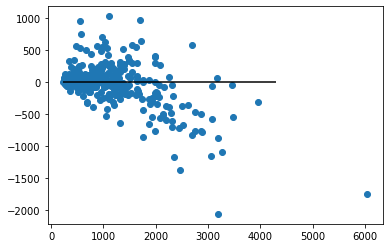

In [982]:
plt.scatter(np.exp(y_test), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

In [983]:
result = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred), 'pctDiff': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),1)})
result
result.pctDiff.mean()

18.690797546012274

# #6 Log-transformed data; without OHE (remove all categorical variables) and no scaling

In [984]:
csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')
df2 = df.drop(["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys", "Gpu_Type"], axis=1)
df2

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,17.3,2.90,32,512,4.70,4279
1,17.3,2.70,32,512,4.60,3564
2,17.3,2.70,16,256,4.60,3025
3,17.3,2.70,32,256,4.60,2929
4,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,1649
1298,10.1,1.44,4,64,0.69,711
1299,10.1,1.44,4,64,0.69,604
1300,10.1,1.44,4,64,0.69,527


In [985]:
import pandas as pd
import numpy as np
df2['Log_Price_dollars'] = np.log(df2['Price_dollars'])

In [986]:
df2 = df2.drop(["Price_dollars"], axis=1)
df2

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Log_Price_dollars
0,17.3,2.90,32,512,4.70,8.361475
1,17.3,2.70,32,512,4.60,8.178639
2,17.3,2.70,16,256,4.60,8.014666
3,17.3,2.70,32,256,4.60,7.982416
4,17.3,2.60,16,128,4.60,7.831617
...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,7.407924
1298,10.1,1.44,4,64,0.69,6.566672
1299,10.1,1.44,4,64,0.69,6.403574
1300,10.1,1.44,4,64,0.69,6.267201


In [987]:
X = df2.drop(["Log_Price_dollars"], axis=1)
y = df2["Log_Price_dollars"]
print(X.shape, y.shape)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 5) (1302,)
(1302, 5) (1302,)


In [988]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6076546331167317


In [989]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred), 'pctDiff': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),1)})
result

,Actual,Predicted,pctDiff
1232,317.0,792.969360,150.1
1030,2452.0,1256.853454,48.7
163,1099.0,894.009600,18.7
1012,1216.0,889.435950,26.9
711,384.0,585.811052,52.6
...,...,...,...
34,1098.0,1413.054542,28.7
85,886.0,493.456151,44.3
978,703.0,934.686446,33.0
156,2299.0,1268.213002,44.8


In [990]:
result[result < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [991]:
result.pctDiff.mean()

34.62116564417178

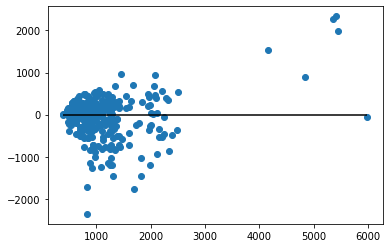

In [992]:
# Plot Residuals
plt.scatter(np.exp(y_pred), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred6).min(), xmax=np.exp(y_pred).max())
plt.show()

# RF regressor test

In [993]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [994]:
X_test

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic
1232,11.6,1.6,4,16,1.20
1030,14.0,2.5,8,256,1.43
163,15.6,2.5,8,1000,2.65
1012,14.0,2.3,4,128,1.47
711,15.6,1.8,4,500,2.00
...,...,...,...,...,...
34,17.3,2.6,16,1000,4.00
85,17.3,1.6,4,256,3.00
978,13.3,2.5,6,1000,1.50
156,15.6,2.9,8,256,2.67


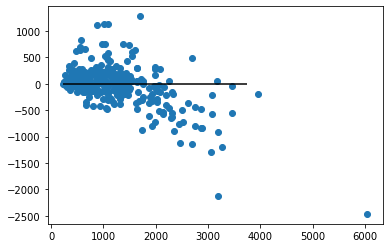

In [995]:
plt.scatter(np.exp(y_test), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

In [996]:
result = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred), 'pctDiff': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),1)})
result

,Actual,Predicted,pctDiff
1232,317.0,367.777351,16.0
1030,2452.0,1694.155193,30.9
163,1099.0,943.856179,14.1
1012,1216.0,1111.612631,8.6
711,384.0,542.102222,41.2
...,...,...,...
34,1098.0,2234.616673,103.5
85,886.0,682.377746,23.0
978,703.0,791.381271,12.6
156,2299.0,1649.516654,28.3


In [997]:
result[result < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [998]:
result.pctDiff.mean()

21.482208588957057